In [1188]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glasstestavkone/glasstestonenew.csv
/kaggle/input/glassmult/glassmult.csv
/kaggle/input/glass/glass.csv
/kaggle/input/glasstestavk1/glasstest.csv


In [1189]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [1190]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Few Data
glass = pd.read_csv('../input/glass/glass.csv')
#Enough Data
#glass = pd.read_csv('../input/glassmult/glassmult.csv')

In [1191]:
print(glass.head)

<bound method NDFrame.head of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>


In [1192]:
X = glass.copy()
y = X.pop('Type')

In [1193]:
print(X.head), print(y.head)
#result - very small amount of data! Imho, better to use - RandomForestRegressor or XGBRegressor. But I'll try:)

<bound method NDFrame.head of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]>
<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64>


(None, None)

In [1194]:
glass['Type'].unique()
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [1195]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

# Scale to [0, 1]. Works fine without normalization on big dataset. On low dataset - works worse.
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_valid = (X_valid - min_) / (max_ - min_)

X_train, X_valid

(           RI        Na        Mg        Al        Si         K        Ca  \
 87   0.232660  0.401504  0.777283  0.383178  0.507143  0.107890  0.246283   
 67   0.455224  0.348872  0.812918  0.180685  0.448214  0.030596  0.410781   
 35   0.198420  0.384962  0.768374  0.286604  0.523214  0.090177  0.291822   
 157  0.441615  0.496241  0.837416  0.090343  0.353571  0.017713  0.392193   
 94   0.225637  0.297744  0.741648  0.373832  0.619643  0.107890  0.261152   
 ..        ...       ...       ...       ...       ...       ...       ...   
 110  0.679982  0.075188  0.000000  0.149533  0.607143  0.000000  0.859665   
 205  0.270852  0.634586  0.000000  0.470405  0.567857  0.000000  0.295539   
 149  0.231782  0.215038  0.783964  0.330218  0.550000  0.091787  0.288104   
 196  0.193591  0.472180  0.000000  0.700935  0.610714  0.022544  0.369888   
 210  0.250219  0.630075  0.000000  0.529595  0.580357  0.000000  0.276022   
 
            Ba        Fe  
 87   0.000000  0.196078  
 67   0.

In [1196]:
#Move to categorical
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [1197]:
pd.DataFrame(y_train[:10,:]).head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1198]:
pd.DataFrame(y_valid[:10,:]).head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1199]:
input_shape = [X_train.shape[1]]
print(input_shape)

[9]


In [1200]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
#7 classes, for multicalss classifiaction better use softmax
    layers.Dense(8, activation='softmax'),
])

In [1201]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
#Use this crossentropy loss function when there are two or more label classes - https://keras.io/api/losses/probabilistic_losses/
#But with binary_crossentropy it alsko worked
    metrics=['accuracy'], 
)

In [1202]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 3.0007 - accuracy: 0.1250 - val_loss: 2.0845 - val_accuracy: 0.0370
Epoch 2/200
1/1 [==============================] - 0s 42ms/step - loss: 2.2654 - accuracy: 0.3063 - val_loss: 2.0694 - val_accuracy: 0.0370
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 2.0957 - accuracy: 0.3625 - val_loss: 2.0542 - val_accuracy: 0.2222
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 1.6495 - accuracy: 0.4375 - val_loss: 2.0387 - val_accuracy: 0.4259
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 1.3844 - accuracy: 0.6000 - val_loss: 2.0229 - val_accuracy: 0.4630
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 1.2703 - accuracy: 0.6313 - val_loss: 2.0078 - val_accuracy: 0.4630
Epoch 7/200
1/1 [==============================] - 0s 43ms/step - loss: 1.2204 - accuracy: 0.5875 - val_loss: 1.9932 - val_accuracy: 0.4630
Epoch 8/200
1/1 [=====

<AxesSubplot:title={'center':'Accuracy'}>

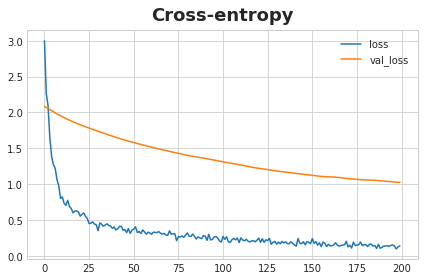

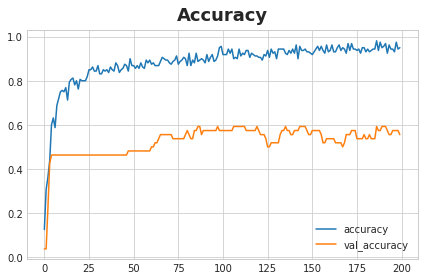

In [1203]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [1204]:
#For several from old dataset:
glasstest = pd.read_csv('../input/glasstestavk1/glasstest.csv')

#For one imagined:
#glasstest = pd.read_csv('../input/glasstestavkone/glasstestonenew.csv')

#Do not put new formula, use max_ and min_ from training. Otherwise will be bad results
#max_ = glasstest.max(axis=0)
#min_ = glasstest.min(axis=0)
glasstest = (glasstest - min_) / (max_ - min_)

result = model.predict(glasstest)

In [1205]:
predictions = np.argmax(result, axis=1)
print(predictions)

[1 1 1 2 7 2 7 7 7 7 7]
